In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB


In [5]:
data=pd.read_csv('titanic.csv')
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder= LabelEncoder()
data['Sex']= encoder.fit_transform(data['Sex'])
data


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,1,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,0,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,0,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,1,26.0,0,0,30.0000


In [8]:
data.dropna(inplace=True)

In [9]:
data.drop(['Name'],axis=1, inplace=True)

In [10]:
data

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,1,27.0,0,0,13.0000
883,1,1,0,19.0,0,0,30.0000
884,0,3,0,7.0,1,2,23.4500
885,1,1,1,26.0,0,0,30.0000


In [12]:
sc=StandardScaler()
data[['Age','Fare']]=sc.fit_transform(data[['Age','Fare']])
data

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,-0.529366,1,0,-0.503586
1,1,1,0,0.604265,1,0,0.783412
2,1,3,0,-0.245958,0,0,-0.490020
3,1,1,0,0.391709,1,0,0.417948
4,0,3,1,0.391709,0,0,-0.487507
...,...,...,...,...,...,...,...
882,0,2,1,-0.175106,0,0,-0.388018
883,1,1,0,-0.741922,0,0,-0.046336
884,0,3,0,-1.592145,1,2,-0.177984
885,1,1,1,-0.245958,0,0,-0.046336


In [13]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Survived'], axis=1), data['Survived'])

model=BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, matthews_corrcoef

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matthew = matthews_corrcoef(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"accuracy = {accuracy} \nf1score = {f1} \nmatthews = {matthew} \nrecall = {recall}")


accuracy = 0.7972972972972973 
f1score = 0.7428571428571429 
matthews = 0.5758825164192041 
recall = 0.7558139534883721


<AxesSubplot: >

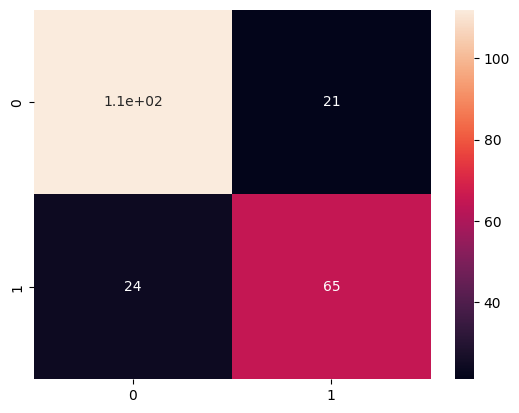

In [15]:
cm= confusion_matrix(y_pred, y_test, labels=[0,1])
sns.heatmap(cm,annot=True)

<AxesSubplot: >

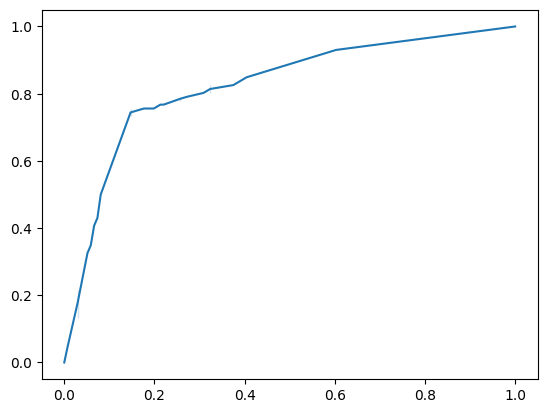

In [17]:
from sklearn.metrics import roc_curve
prob=model.predict_proba(x_test)
prob=prob[:,1]
fpr,tpr,_=roc_curve(y_test,prob)
sns.lineplot(x=fpr, y=tpr)